In [2]:
import pandas as pd              # Veri tablosu ile çalışmak için (Excel gibi düşün)
import matplotlib.pyplot as plt  # Grafik çizmek için (x-y grafikleri, scatter vs.)
import seaborn as sns            # Daha şık ve hazır grafikler çizmek için
import numpy as np               # Matematik ve sayılar için (hesap makinesi gibi)

from sklearn.linear_model import LinearRegression     # Basit düz çizgi modeli (lineer regresyon)

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# PolynomialFeatures: Veriye ekstra kolon ekler (x, x², x³ gibi) → eğri çizebilmek için
# StandardScaler: Verileri standart hale getirir (ortalama=0, dağılım düzgün olur)

from sklearn.model_selection import train_test_split  
# Veriyi 2 parçaya ayırır:
#   1) Train (öğrenme için)
#   2) Test (sınav için, modelin ne kadar öğrendiğini görmek için)

from sklearn.metrics import r2_score, mean_squared_error  
# r2_score: Modelin ne kadar başarılı olduğunu gösterir (1 = süper, 0 = kötü)
# mean_squared_error (MSE): Tahminle gerçek arasındaki hata. Küçükse = iyi.

from sklearn.pipeline import Pipeline  
# Bütün işlemleri sırayla yapmak için kutu gibi bir yapı:
#   örnek → (önce PolynomialFeatures → sonra StandardScaler → sonra LinearRegression)

In [3]:
df = pd.read_csv('3-customersatisfaction.csv')

In [4]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [5]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [6]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


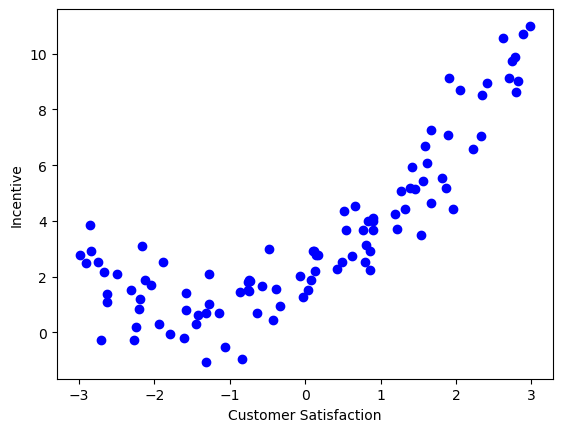

In [8]:
plt.scatter(df["Customer Satisfaction"], df["Incentive"], color="b")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [9]:
# dependent & independent features
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [11]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [12]:
y.head()

0     1.010513
1     2.281043
2     4.415053
3    10.563600
4     0.627365
Name: Incentive, dtype: float64

In [13]:
# train - test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [15]:
X_train

,Customer Satisfaction
99,0.512504
3,2.625838
20,-0.865714
55,-1.145369
6,2.823460
...,...
28,1.191020
0,-1.282447
5,-1.311432
12,0.490521


In [16]:
# scaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
regression = LinearRegression()

In [20]:
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
## prediction

In [22]:
y_pred = regression.predict(X_test)

In [23]:

y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [24]:
score = r2_score(y_test, y_pred)
print(score)

0.2705652535622245


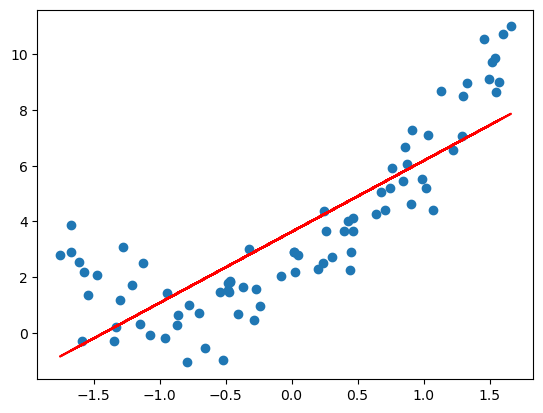

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = "r")
plt.show()

In [44]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [45]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [46]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [47]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

LinearRegression()

In [48]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.7685687698788557


In [49]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [50]:
regression.intercept_

2.0766764297932805

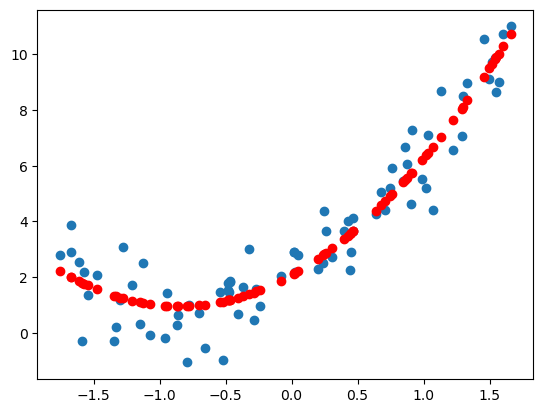

In [51]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "r")
plt.show()

In [52]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [53]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.7573443621401048


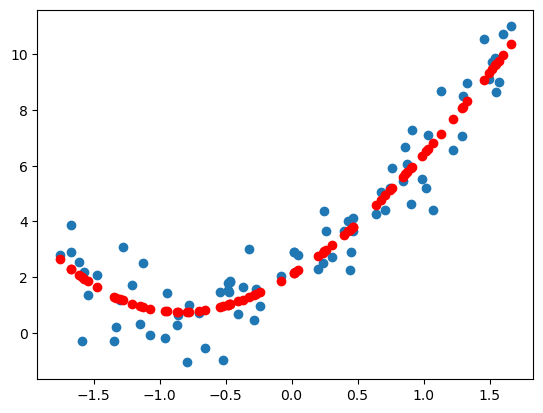

In [54]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "r")
plt.show()

In [55]:
# new data

In [56]:
new_df = pd.read_csv("3-newdatas.csv")


In [57]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [58]:
new_df.rename(columns = {"0": "Customer Satisfaction"}, inplace=True)

In [59]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [60]:
X_new = new_df[["Customer Satisfaction"]]

In [61]:
X_new

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [67]:
X_new = scaler.fit_transform(X_new)
# Yeni değerlerimizi hazırlıyoruz (X_new).
# Ama önce onları "ölçü birimi aynı olsun" diye düzeltiyoruz.
# Mesela biri cm, biri metre olmasın diye hepsini aynı ölçüye çeviriyoruz.

In [68]:
X_new_poly = poly.transform(X_new)
# Düzeltilmiş bu sayıları alıp polinom haline getiriyoruz.
# Yani sadece x değil, x², x³ gibi kuvvetlerini de ekliyoruz.
# Çünkü düz çizgi değil, eğri çizmek istiyoruz.

In [69]:
y_new = regression.predict(X_new_poly)
# Artık modelimize soruyoruz:
# "Bak, bu yeni X değerleri var. Bana karşılık gelen Y değerlerini tahmin et."
# Model cevap veriyor = y_new

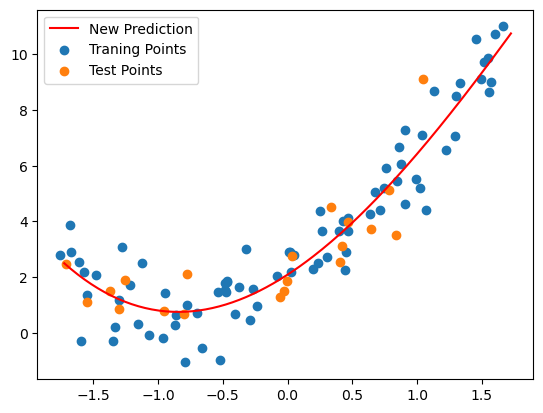

In [76]:
plt.plot(X_new, y_new, "r", label="New Prediction")
plt.scatter(X_train, y_train, label="Traning Points")
plt.scatter(X_test, y_test, label="Test Points")
plt.legend()
plt.show()

In [77]:
#pipeline

In [ ]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = pipeline([
        ("standart_sclaer", scaler),
        ("poly_features", poly_features)
        ("lin_reg", Lin_reg)
        
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("R2 Score:", score)